# LeR complete examples

* Please refer to the [documentation](https://ler.readthedocs.io/en/latest/) for more details.

## Short lensed/unlensed BBH example with three detectors

* This part of the notebook is a short example to simulate lensed and unlensed binary black hole mergers and calculate their rates ($yr^{-1}$) and finally compare the results.
* All the outputs are saved in the `ler_data` directory by default.

In [1]:
# call the LeR class
from ler.rates import LeR

* class initialization
* if you want the models and its parameters to print.

    ```ler = LeR()```
    
* set 'npool' according to your machine's available CPU cores. Default is 4.
* to check no. of cores, 

    ```import multiprocessing as mp```
    
    ```print(mp.cpu_count())```

In [2]:
ler = LeR(verbose=False, create_new_interpolator=False)

### Simulation of the GW CBC population (unlensed).

* this will generate a json file with the simulated population parameters
* by default 100,000 events will be sampled with batches of 50,000. For more realistic results, keep batch_size=50000 and size>=1000000.
* results will be saved in the same directory as json file.
* resume=True will resume the simulation from the last saved batch.
* if you dont't need to save the file at the end of each batch sampling, set save_batch=False.

In [3]:
# ler.batch_size = 100000 # for faster computation
unlensed_param = ler.unlensed_cbc_statistics(size=100000, resume=False, save_batch=False)

unlensed params will be store in ./ler_data/unlensed_param.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./ler_data/unlensed_param.json...


### Calculation of unlensed rates

In [4]:
_, data = ler.unlensed_rate();

getting unlensed_params from json file ./ler_data/unlensed_param.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 405.8097545623249
number of simulated unlensed detectable events: 392
number of all simulated unlensed events: 100000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json


In [5]:
data.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])

### Simulation of the GW CBC population (lensed).

* this will generate a json file with the simulated source parameters, lensed parameters and image parameters.
* if the program hangs dues to memory issues,
  * try reducing the batch size.
  * and you can resume from the last saved batch. But you need to set save_batch=True.
  * save_batch=False will make the code run faster but you will not have the results saved in the end of each batch.

In [6]:
# ler.batch_size = 50000
lensed_param = ler.lensed_cbc_statistics(size=100000, resume=False, save_batch=False)

lensed params will be store in ./ler_data/lensed_param.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3453.79it/s]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:13<00:00, 3597.76it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.35it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param.json...


* what are the saved files?

In [7]:
ler.json_file_names

{'ler_params': 'ler_params.json',
 'unlensed_param': 'unlensed_param.json',
 'unlensed_param_detectable': 'unlensed_param_detectable.json',
 'lensed_param': 'lensed_param.json',
 'lensed_param_detectable': 'lensed_param_detectable.json'}

### Calculation of lensed rates

In [8]:
ler.lensed_rate();

getting lensed_params from json file ./ler_data/lensed_param.json...
given detectability_condition == 'step_function'
total lensed rate (yr^-1) (with step function): 1.0330580915256682
number of simulated lensed detectable events: 416
number of simulated all lensed events: 100000
storing detectable lensed params in ./ler_data/lensed_param_detectable.json


### Comparison of the rates

In [9]:
ler.rate_ratio();

unlensed_rate: 405.8097545623249
lensed_rate: 1.0330580915256682
ratio: 392.82375104676464


* if you want to calculate the rates, and compare it at the same time, run the following command.

    ```rate_ratio, unlensed_param_detectable, lensed_param_detectable =ler.rate_comparision_with_rate_calculation()```

* looking at the available parameters
* Note: This is for spin-less systems. IMRPhenomD (spin-less) is the default waveform approximant. To see LeR configuration, run

    ```ler.print_all_params()```

### getting generated parameters

* you can use ler attributes or call the relevant json file

In [10]:
unlensed_param_detectable = ler.unlensed_param_detectable
lensed_param_detectable = ler.lensed_param_detectable
print(unlensed_param_detectable.keys())
print(lensed_param_detectable.keys())

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])
dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])


* Note: all ler initialization parameters and results are saved in a json file.

In [11]:
from ler.utils import load_json
# ler_params = load_json(ler.ler_directory+"/"+ler.json_file_names["lensed_params"])
ler_params = load_json('ler_data/ler_params.json')
print(ler_params.keys())
print("detectable_unlensed_rate_per_year: ", ler_params['detectable_unlensed_rate_per_year'])
print("detectable_lensed_rate_per_year; ",ler_params['detectable_lensed_rate_per_year'])
print("rate_ratio: ",ler_params['rate_ratio'])

dict_keys(['npool', 'z_min', 'z_max', 'size', 'batch_size', 'cosmology', 'snr_finder', 'json_file_names', 'interpolator_directory', 'gw_param_sampler_dict', 'snr_calculator_dict', 'detectable_unlensed_rate_per_year', 'detectability_condition', 'detectable_lensed_rate_per_year', 'rate_ratio'])
detectable_unlensed_rate_per_year:  405.8097545623249
detectable_lensed_rate_per_year;  1.0330580915256682
rate_ratio:  392.82375104676464


getting gw_params from json file ler_data/unlensed_param_detectable.json...
getting gw_params from json file ler_data/unlensed_param.json...
getting gw_params from json file ler_data/lensed_param_detectable.json...
getting gw_params from json file ler_data/lensed_param.json...


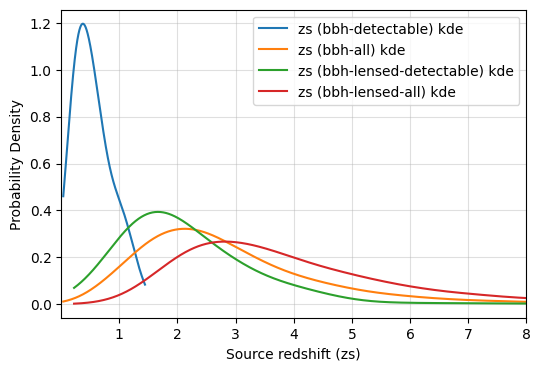

In [12]:
# quick plot
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt

# plotting the distribution of event parameters
# comparision of redshift distribution for lensed and unlensed events
# param_dict can be either a dictionary or a json file name that contains the parameters
plt.figure(figsize=(6, 4))
# for unlensed case
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/unlensed_param_detectable.json',
    plot_label='zs (bbh-detectable)',
    histogram=False,
    kde=True,
    kde_bandwidth=0.5,
)
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/unlensed_param.json',
    plot_label='zs (bbh-all)',
    histogram=False,
    kde=True,
)
# for lensed case
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/lensed_param_detectable.json',
    plot_label='zs (bbh-lensed-detectable)',
    histogram=False,
    kde=True,
    kde_bandwidth=0.5,
)
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/lensed_param.json',
    plot_label='zs (bbh-lensed-all)',
    histogram=False,
    kde=True,
)
plt.xlim(0.001,8)
plt.grid(alpha=0.4)
plt.xlabel('Source redshift (zs)')
plt.ylabel('Probability Density')
plt.show()

## Custom functions

* `ler` allows internal model functions to be change with custom functions.

* It also allows to change the default parameters of the existing model functions.

First let's look at what are the input parameters available for ler.LeR. The input paramters can divided into five categories

1. ler.LeR set up params

2. ler.CBCSourceParameterDistribution set up params (as kwargs)

3. ler.LensGalaxyParameterDistribution set up params (as kwargs)

4. ler.ImageProperties set up params (as kwargs)

5. gwsnr.GWSNR set up params (as kwargs)

In [13]:
import matplotlib.pyplot as plt
from ler.rates import LeR
ler = LeR(npool=4)  # verbose=True 

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density_bbh_popI_II_oguri2018/merger_rate_density_bbh_popI_II_oguri2018_0.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_1.pickle
velocity_dispersion_ewoud interpolator will be load

As an example, I will change,

  * merger_rate_density_params's default value of **local merger rate density** ($R_0$) to 2.3e-9 $Mpc^{-3} yr^{-1}$. But, I am still using the default merger_rate_density function, which is 'merger_rate_density_bbh_popI_II_oguri2018'.

  * **source_frame_masses** to a custom function. This is similar to the internal default function, i.e. PowerLaw+Peak model. I am using `gwcosmo`'s powerlaw_gaussian prior for this example.

  * **optical depth** for strong lensing condition and **velocity dispersion** of the lensing galaxy to SIS model and gamma function respectively. The default optical depth is for the SIE model and default velocity dispersion has additional redshift dependence.
  
  * `gwsnr` parameters: By default, it uses 'IMRPhenomD' **waveform model** with no spin. It uses interpolation method to find the 'snr' and it is super fast. But for the example below, I am using 'IMRPhenomXPHM` with precessing spins. This is without interpolation but through inner product method. It will be slower.

In [16]:
from gwcosmo import priors as p

# define your custom function of mass_1_source and mass_2_source calculation
# it should have 'size' as the only argument
def powerlaw_peak(size):
    """
    Function to sample mass1 and mass2 from a powerlaw with a gaussian peak

    Parameters
    ----------
    size : `int`
        Number of samples to draw

    Returns
    -------
    mass_1_source : `numpy.ndarray`
        Array of mass1 samples
    mass_2_source : `numpy.ndarray`
        Array of mass2 samples
    """


    # below is the gwcosmo default values
    mminbh=4.98  # Minimum mass of the black hole (Msun)
    mmaxbh=86.22  # Maximum mass of the black hole (Msun) 
    alpha=2.63  # Spectral index for the powerlaw of the primary mass distribution
    mu_g=33.07  # Mean of the Gaussian component in the primary mass distribution
    sigma_g=5.69  # Width of the Gaussian component in the primary mass distribution
    lambda_peak=0.10  # Fraction of the model in the Gaussian component
    delta_m=4.82  # Range of mass tapering on the lower end of the mass distribution
    beta=1.26  # Spectral index for the powerlaw of the mass ratio distribution

    model = p.BBH_powerlaw_gaussian(
        mminbh=mminbh,
        mmaxbh=mmaxbh,
        alpha=alpha,
        mu_g=mu_g,
        sigma_g=sigma_g,
        lambda_peak=lambda_peak,
        delta_m=delta_m,
        beta=beta,
    )
    # sample mass1 and mass2
    mass_1_source, mass_2_source = model.sample(Nsample=size)

    return (mass_1_source, mass_2_source)

* Initialize the class with the custom function

* changing ler input params

In [17]:
from ler.rates import LeR

ler = LeR(npool=4, verbose=False,
    # for source parameters  
    source_priors=dict(
        merger_rate_density='merger_rate_density_bbh_popI_II_oguri2018',
        source_frame_masses=powerlaw_peak,
    ),
    source_priors_params=dict(
        merger_rate_density=dict(
            R0=2.9e-08,
            b2=1.6,
            b3=2.0,
            b4=30
        ),
        source_frame_masses=None,
    ),
    # for lens parameters
    lens_functions=dict(
        strong_lensing_condition="rjs_with_cross_section_SIS",
        optical_depth="optical_depth_SIS_haris",
    ),
    lens_priors=dict(
        velocity_dispersion="velocity_dispersion_gengamma",
    ),
    lens_priors_params=dict(
        velocity_dispersion=dict(a=2.32 / 2.67, c=2.67)
    ),
    # for snr generation
    waveform_approximant = 'IMRPhenomXPHM',
    snr_type='inner_product',
    spin_zero=False,
    spin_precession=True,
)

In [18]:
ler.batch_size = 50000
ler.unlensed_cbc_statistics(size=100000, resume=False, output_jsonfile = 'new_unlensed_params.json');

unlensed params will be store in ./ler_data/new_unlensed_params.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 40572/40572 [02:10<00:00, 310.84it/s]


Batch no. 2
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 40780/40780 [00:56<00:00, 719.38it/s]


saving all unlensed_params in ./ler_data/new_unlensed_params.json...


In [6]:
ler.lensed_cbc_statistics(size=100000, resume=False, output_jsonfile = 'new_lensed_params.json');

lensed params will be store in ./ler_data/new_lensed_params.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = _np.exp(_np.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:162: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:160: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)-_np.log(self.norm)
100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3402.16it/s]


Invalid sample found. Resampling 1 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.72s/it]

calculating snrs...
solving SNR with inner product



100%|████████████████████████████████████████████████████████| 36386/36386 [00:42<00:00, 864.39it/s]


solving SNR with inner product


100%|████████████████████████████████████████████████████████| 36303/36303 [00:42<00:00, 859.12it/s]


solving SNR with inner product


100%|██████████████████████████████████████████████████████████| 5296/5296 [00:09<00:00, 576.36it/s]


solving SNR with inner product


100%|██████████████████████████████████████████████████████████| 4523/4523 [00:07<00:00, 592.17it/s]


Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3359.80it/s]


Invalid sample found. Resampling 1 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.99s/it]

calculating snrs...
solving SNR with inner product



100%|████████████████████████████████████████████████████████| 36156/36156 [00:42<00:00, 857.64it/s]


solving SNR with inner product


100%|████████████████████████████████████████████████████████| 36096/36096 [00:42<00:00, 853.79it/s]


solving SNR with inner product


100%|██████████████████████████████████████████████████████████| 5232/5232 [00:09<00:00, 574.98it/s]


solving SNR with inner product


100%|██████████████████████████████████████████████████████████| 4402/4402 [00:07<00:00, 586.65it/s]


* generate detectable events and compute the rate ratio

* note: here no input params are provided, so it will track the json files generated above

* For individual rate computation, use
    ```ler.unlensed_rate();```
    ```ler.lensed_rate();```

In [19]:
rate_ratio, unlensed_param_detectable, lensed_param_detectable =ler.rate_comparision_with_rate_calculation(
    unlensed_param='new_unlensed_params.json',
    snr_threshold_unlensed=8.0,
    lensed_param='new_lensed_params.json',
    output_jsonfile_unlensed='new_unlensed_params_detectable.json',
    output_jsonfile_lensed='new_lensed_params_detectable.json',
    snr_threshold_lensed=[8.0,8.0],
    num_img=[1,1],
)

getting unlensed_params from json file ./ler_data/new_unlensed_params.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 896.5082843137075
number of simulated unlensed detectable events: 866
number of all simulated unlensed events: 100000
storing detectable unlensed params in ./ler_data/new_unlensed_params_detectable.json
getting lensed_params from json file ./ler_data/new_lensed_params.json...
given detectability_condition == 'step_function'
total lensed rate (yr^-1) (with step function): 0.6570084100456169
number of simulated lensed detectable events: 650
number of simulated all lensed events: 100000
storing detectable lensed params in ./ler_data/new_lensed_params_detectable.json
unlensed_rate (per year): 896.5082843137075
lensed_rate (per year): 0.6570084100456169
ratio: 1364.5309110296803


**Important Note:**
* input parameters, snr_threshold_lensed=[8.0,8.0], num_img=[1,1], means that two of the images should have snr>8.0. You can also set: snr_threshold_lensed=8, num_img=2

* Similarly, if snr_threshold_lensed=[8.0,6.0], num_img=[2,2], it means that two of the images should have snr>8.0 and other two images should have snr>6.0. But in this case, even though the simulated lensed (detectable) events are correct, the rate calculation will not be right as the strong lensing condition was set for 2 image case.

In [20]:
# to check all the stored json file names
# all this files are stored in the ler.ler_directory
ler.json_file_names

{'ler_params': 'ler_params.json',
 'unlensed_param': 'new_unlensed_params.json',
 'unlensed_param_detectable': 'new_unlensed_params_detectable.json',
 'lensed_param': 'new_lensed_params.json',
 'lensed_param_detectable': 'new_lensed_params_detectable.json'}

* again you can call the generated detectable events' parameters using an instance attribute

* Note: The data is not stored in this instance attribute, it is stored in the json file. This scheme is used to save RAM memory.

In [21]:
unlensed_param_detectable = ler.unlensed_param_detectable
print(unlensed_param_detectable.keys())
lensed_param_detectable = ler.lensed_param_detectable
print(lensed_param_detectable.keys())

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])
dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])


### How to look for available model functions?

* All available names are stored as a dict in `ler` instance

* the keys of this dict shows the parameter type

* the values are also dict, where the keys are the model function names and the values are their input parameters

In [22]:
# for unlensed case
print(ler.available_gw_prior_list_and_its_params['source_frame_masses'])
# for lensed case
print(ler.available_lens_prior_list_and_its_params['velocity_dispersion'])

{'binary_masses_BBH_popI_II_powerlaw_gaussian': {'mminbh': 4.98, 'mmaxbh': 112.5, 'alpha': 3.78, 'mu_g': 32.27, 'sigma_g': 3.88, 'lambda_peak': 0.03, 'delta_m': 4.8, 'beta': 0.81}, 'binary_masses_BBH_popIII_lognormal': {'Mc': 30.0, 'sigma': 0.3, 'beta': 1.1}, 'binary_masses_BBH_primordial_lognormal': {'Mc': 30.0, 'sigma': 0.3, 'beta': 1.1}, 'binary_masses_BNS_gwcosmo': {'mminns': 1.0, 'mmaxns': 3.0, 'alphans': 0.0}, 'binary_masses_BNS_bimodal': {'w': 0.643, 'muL': 1.352, 'sigmaL': 0.08, 'muR': 1.88, 'sigmaR': 0.3, 'mmin': 1.0, 'mmax': 2.3}}
{'velocity_dispersion_haris': {'a': 0.8689138576779026, 'c': 2.67}, 'velocity_dispersion_gengamma': {'a': 0.8689138576779026, 'c': 2.67}, 'velocity_dispersion_bernardi': None, 'velocity_dispersion_ewoud': None}


* for looking at the choosen models and its input parameters

In [23]:
# for unlensed case
print(ler.gw_param_samplers)
print(ler.gw_param_samplers_params)
# for lensed case
print(ler.lens_param_samplers)
print(ler.lens_param_samplers_params)

{'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 'source_frame_masses': <function powerlaw_peak at 0x29b625e10>, 'zs': 'sample_source_redshift', 'geocent_time': 'sampler_uniform', 'ra': 'sampler_uniform', 'dec': 'sampler_cosine', 'phase': 'sampler_uniform', 'psi': 'sampler_uniform', 'theta_jn': 'sampler_sine', 'a_1': 'sampler_uniform', 'a_2': 'sampler_uniform', 'tilt_1': 'sampler_sine', 'tilt_2': 'sampler_sine', 'phi_12': 'sampler_uniform', 'phi_jl': 'sampler_uniform'}
{'merger_rate_density': {'R0': 2.9e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}, 'source_frame_masses': None, 'zs': None, 'geocent_time': {'min_': 1238166018, 'max_': 1269702018}, 'ra': {'min_': 0.0, 'max_': 6.283185307179586}, 'dec': None, 'phase': {'min_': 0.0, 'max_': 6.283185307179586}, 'psi': {'min_': 0.0, 'max_': 3.141592653589793}, 'theta_jn': None, 'a_1': {'min_': 0.0, 'max_': 0.8}, 'a_2': {'min_': 0.0, 'max_': 0.8}, 'tilt_1': None, 'tilt_2': None, 'phi_12': {'min_': 0, 'max_': 6.283185307179586}, 'ph

## Using internal model functions

### Mass distribution of BBH (mass-1, larger mass only)

* compare the default mass distribution with the custom mass distribution

In [24]:
# calling the default mass distribution model
mass_1_source, mass_2_source = ler.binary_masses_BBH_popI_II_powerlaw_gaussian(size=10000)
default_model_dict = dict(mass_1_source=mass_1_source)

# calling the custom mass distribution model
mass_1_source, mass_2_source = powerlaw_peak(size=10000)
custom_model_dict = dict(mass_1_source=mass_1_source)

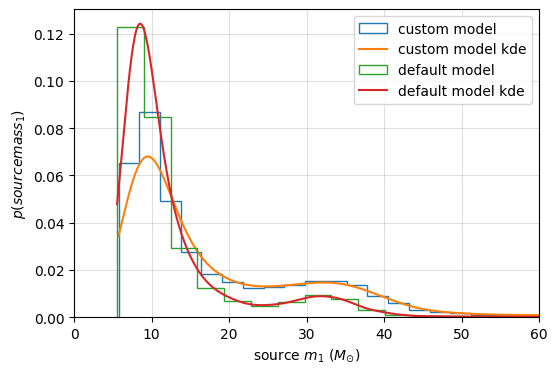

In [25]:
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt

# let's do a comparision plot between you custom model and the default model
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=custom_model_dict, # or the json file name
    plot_label='custom model',
);
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=default_model_dict,
    plot_label='default model',
);
plt.xlabel(r'source $m_1$ ($M_{\odot}$)')
plt.ylabel(r'$p(source mass_1)$')
plt.xlim(0,60)
plt.grid(alpha=0.4)
plt.show()

### Axis-ratio of the lensing 

* compare the default axis-ratio distribution (gengamma, from SDSS galaxy catalogue, Haris et al. 2018) with axis-ratio distribution from Padilla and Strauss 2008 

In [26]:
size = 10000
padilla_strauss = ler.axis_ratio_padilla_strauss(size=size)

# axis_ratio_rayleigh depends on the velocity dispersion
sigma = ler.velocity_dispersion_gengamma(size=size)
rayleigh = ler.axis_ratio_rayleigh(sigma=sigma)

# make a dict
axis_ratio_dict = dict(
    padilla_strauss=padilla_strauss,
    rayleigh=rayleigh,
)

axis_ratio_spline_coeff interpolator will be generated at ./interpolator_pickle/axis_ratio/axis_ratio_spline_coeff_0.pickle
axis_ratio interpolator will be loaded from ./interpolator_pickle/axis_ratio/axis_ratio_1.pickle


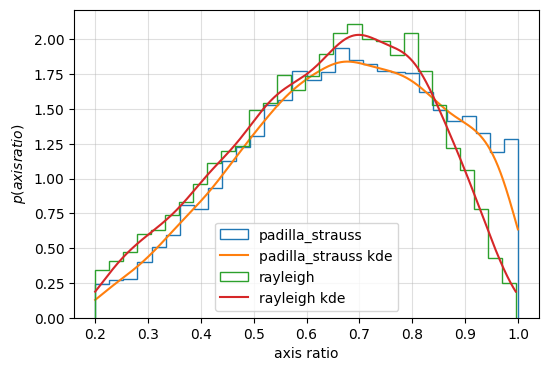

In [27]:
# plot the distribution of axis-ratio
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="padilla_strauss",
    param_dict=axis_ratio_dict,
    plot_label='padilla_strauss',
)
lerplt.param_plot(
    param_name="rayleigh",
    param_dict=axis_ratio_dict,
    plot_label='rayleigh',
)
plt.xlabel(r'axis ratio')
plt.ylabel(r'$p(axis ratio)$')
plt.grid(alpha=0.4)
plt.show()

## Selecting particular number of detectable events

* this is particularly useful when you want only the detectable events to be saved in the json file

* detectable event rates will be calculated at each batches. Subsequent batch will consider the previous batch's detectable events. So, the rates will become more accurate as the batch number increases and will converge to a stable value at higher samples. 

* you can resume the rate calculation from the last saved batch.

In [28]:
from ler.rates import LeR

# class initialization
ler = LeR(verbose=False)

### unlensed case 

* SNR>8

In [29]:
n_size_unlensed_param = ler.selecting_n_unlensed_detectable_events(
    size=5000, 
    snr_threshold=8.0,
    batch_size=50000,
    resume=False,
    output_jsonfile='unlensed_params_n_detectable.json',
    meta_data_file="meta_unlensed.json",
    )

collected number of detectable events =  0
collected number of detectable events =  198
total number of events =  50000
total unlensed rate (yr^-1): 409.9506704252058
collected number of detectable events =  431
total number of events =  100000
total unlensed rate (yr^-1): 446.18368422541334
collected number of detectable events =  621
total number of events =  150000
total unlensed rate (yr^-1): 428.58479180816965
collected number of detectable events =  837
total number of events =  200000
total unlensed rate (yr^-1): 433.24332215391064
collected number of detectable events =  1067
total number of events =  250000
total unlensed rate (yr^-1): 441.8357225693884
collected number of detectable events =  1305
total number of events =  300000
total unlensed rate (yr^-1): 450.3246000882942
collected number of detectable events =  1516
total number of events =  350000
total unlensed rate (yr^-1): 448.40203200909946
collected number of detectable events =  1721
total number of events =  4000

**Important Note**: At each iteration, rate is calculated using the cummulatively increasing number of events. It become stable at around 2 million events. This is the number of events that is required to get a stable rate.

* Now get the sampled (detectable) events.

### For lensed case

* 2 images, snr>8 (super-threshold)
* 1 image, snr>6 (sub+super-threshold)

In [30]:
n_size_lensed_param = ler.selecting_n_lensed_detectable_events(
    size=500,
    snr_threshold=[8.0,6.0],
    num_img=[2,1],
    batch_size=50000,
    resume=False,
    output_jsonfile='unlensed_params_n_detectable.json',
    meta_data_file="meta_lensed.json",
    )

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.37it/s]


collected number of events =  94
total number of events =  50000
total lensed rate (yr^-1): 0.46686279136256165


100%|███████████████████████████████████████████████████████| 50000/50000 [00:13<00:00, 3604.41it/s]


collected number of events =  199
total number of events =  100000
total lensed rate (yr^-1): 0.49417923128271146


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.56s/it]


collected number of events =  290
total number of events =  150000
total lensed rate (yr^-1): 0.4801071258693009


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.63s/it]


collected number of events =  393
total number of events =  200000
total lensed rate (yr^-1): 0.4879709494826774


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.43s/it]


collected number of events =  484
total number of events =  250000
total lensed rate (yr^-1): 0.4807693425946379


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.08it/s]


collected number of events =  578
total number of events =  300000
total lensed rate (yr^-1): 0.47845158405595845
storing detectable lensed params in ./ler_data/unlensed_params_n_detectable.json

 trmming final result to size=500


In [31]:
print(n_size_lensed_param.keys())
print(f"size of each parameters={len(n_size_lensed_param['zl'])}")

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])
size of each parameters=500


* let's see the meta file

In [32]:
from ler.utils import load_json

# unlensed
meta = load_json('ler_data/meta_unlensed.json')
print(meta)

{'events_total': [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000, 850000, 900000, 950000, 1000000, 1050000, 1100000, 1150000, 1200000], 'detectable_events': [198.0, 431.0, 621.0, 837.0, 1067.0, 1305.0, 1516.0, 1721.0, 1929.0, 2139.0, 2348.0, 2572.0, 2785.0, 2982.0, 3207.0, 3408.0, 3609.0, 3818.0, 4029.0, 4239.0, 4467.0, 4649.0, 4856.0, 5074.0], 'total_rate': [409.9506704252058, 446.18368422541334, 428.58479180816965, 433.24332215391064, 441.8357225693884, 450.3246000882942, 448.40203200909946, 445.40726250112317, 443.76814997206617, 442.87095153510865, 441.94865663837606, 443.7681499720661, 443.5557953124312, 441.00753939681226, 442.6639057419646, 441.00753939681226, 439.54603968050134, 439.167132346643, 439.0460529354476, 438.8335585687998, 440.41597998782925, 437.52540560302606, 437.13668326411926, 437.72931433869826]}


## Using custom detection criteria

* let's replace the default calculator in `LeR` with a 'pdet' calculator.

* I choose a 'pdet' calculator from gwsnr that's checks whether the event has snr>8 or not.

In [35]:
from ler.rates import LeR
from gwsnr import GWSNR
import numpy as np

* let's look at the input and output of 'pdet' calculator

In [36]:
snr_ = GWSNR(gwsnr_verbose=False, pdet=True)

psds not given. Choosing bilby's default psds
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_0.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_0.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_0.pickle


In [37]:
# initialization pdet calculator
pdet_calculator = snr_.snr

# test
pdet_calculator(
    gw_param_dict=dict(
        mass_1=np.array([10.0]),
        mass_2=np.array([10.0]),
    )
)

{'L1': array([1]), 'H1': array([1]), 'V1': array([1]), 'pdet_net': array([1])}

**Note:** pdet function has input==>'gw_param_dict' and output==>'pdet_net'.

In [38]:
ler = LeR(verbose=False, pdet_finder=pdet_calculator)

In [39]:
unlensed_param = ler.unlensed_cbc_statistics();

unlensed params will be store in ./ler_data/unlensed_param.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating pdet...
Batch no. 2
sampling gw source params...
calculating pdet...
saving all unlensed_params in ./ler_data/unlensed_param.json...


In [40]:
unlensed_param.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'pdet_net'])

* now calculate rate using the custom 'pdet' calculator

In [41]:
_, unlensed_param_detectable = ler.unlensed_rate()

getting unlensed_params from json file ./ler_data/unlensed_param.json...
given detectability_condition == 'pdet'
total unlensed rate (yr^-1) (with step function): 432.7257076710505
number of simulated unlensed detectable events: 418
number of all simulated unlensed events: 100000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json


In [42]:
ler.batch_size = 50000
lensed_param = ler.lensed_cbc_statistics(size=100000)

lensed params will be store in ./ler_data/lensed_param.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:14<00:00, 3480.83it/s]


Invalid sample found. Resampling 1 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.75s/it]


calculating pdet...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:13<00:00, 3613.18it/s]


Invalid sample found. Resampling 2 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.39s/it]


calculating pdet...
saving all lensed_params in ./ler_data/lensed_param.json...


In [43]:
lensed_param.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'pdet_net'])

In [44]:
_, lensed_param_detectable = ler.lensed_rate(detectability_condition='pdet')

getting lensed_params from json file ./ler_data/lensed_param.json...
given detectability_condition == 'pdet'
total lensed rate (yr^-1) (with pdet function): 1.147290476646295
number of simulated lensed detectable events: 462
number of simulated all lensed events: 100000
storing detectable lensed params in ./ler_data/lensed_param_detectable.json
